In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df= pd.read_csv('/content/Mall_Customers.csv')

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] =le.fit_transform(df['Gender'])

In [32]:
#from sklearn.preprocessing import OneHotEncoder
##from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
#df = pd.DataFrame(ct.fit_transform(df))

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [35]:
df.dtypes

,0
CustomerID,int64
Gender,int64
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [37]:
df.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize (excluding 'CustomerID' and 'Gender' since they are not numerical features for clustering)
# You might want to include 'Gender' if you are using a different approach or if it's relevant to your analysis
columns_to_standardize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the head of the standardized dataframe
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


In [39]:
from sklearn.decomposition import PCA

# Select the features for PCA (excluding 'CustomerID' and 'Gender' as done during standardization)
features_for_pca = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features_for_pca]

# Initialize PCA with the desired number of components (e.g., 2 for visualization)
# You can adjust the number of components based on your needs
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA on the standardized data and transform it
principal_components = pca.fit_transform(X)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'principal_component_{i+1}' for i in range(n_components)])

# Display the head of the PCA transformed data
display(pca_df.head())

,principal_component_1,principal_component_2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


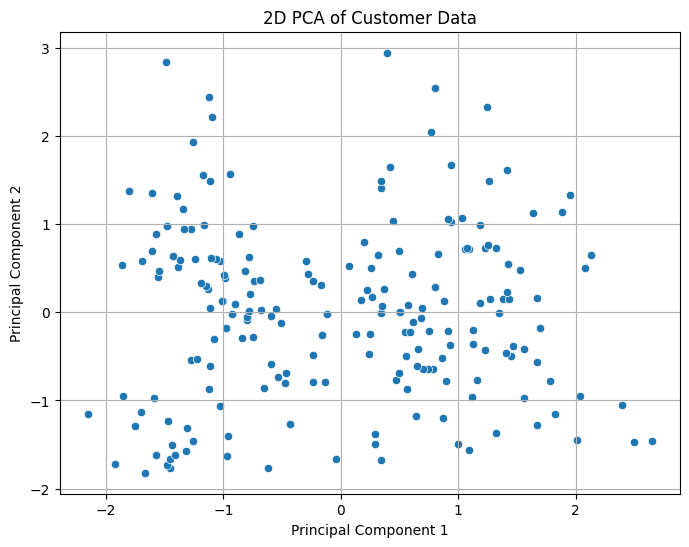

In [40]:
# Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', data=pca_df)
plt.title('2D PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [41]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (e.g., using the elbow method or silhouette score)
# For now, let's assume a reasonable number of clusters, say 5
n_clusters = 5

# Initialize and fit KMeans on the PCA transformed data
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(pca_df)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Display the head of the dataframe with cluster labels
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,-1.424569,-1.738999,-0.434801,4
1,2,1,-1.281035,-1.738999,1.195704,4
2,3,0,-1.352802,-1.700830,-1.715913,0
3,4,0,-1.137502,-1.700830,1.040418,4
4,5,0,-0.563369,-1.662660,-0.395980,4


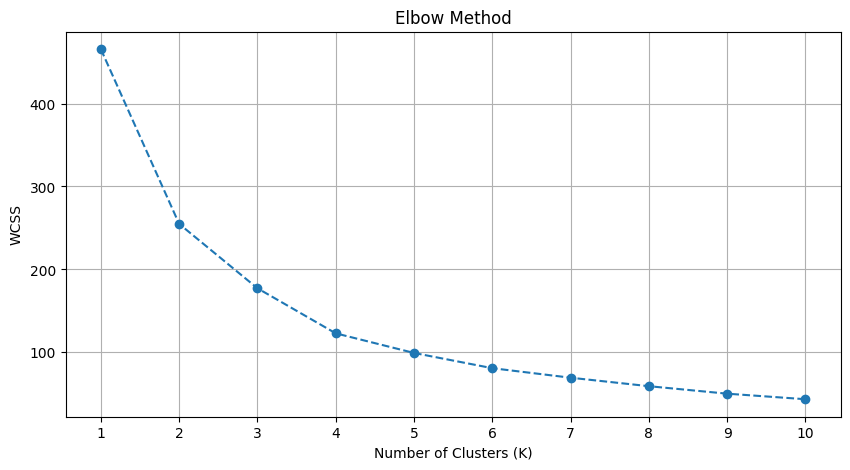

In [42]:
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

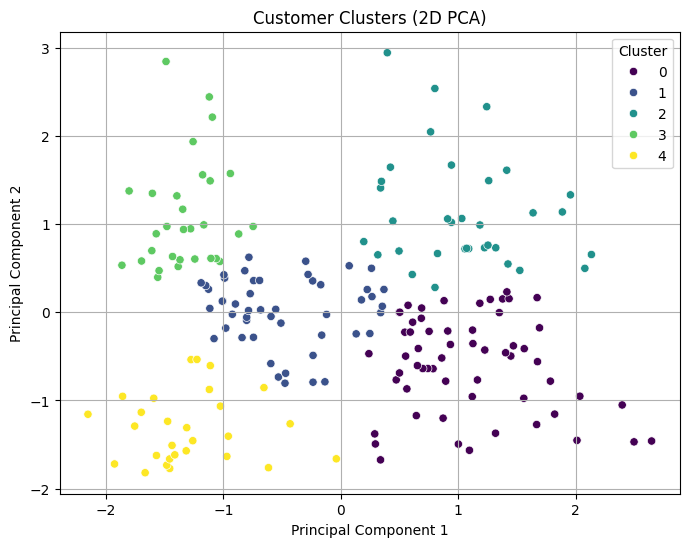

In [43]:
# Visualize the clusters with color-coding
plt.figure(figsize=(8, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='Cluster', data=pd.concat([pca_df, df['Cluster']], axis=1), palette='viridis', legend='full')
plt.title('Customer Clusters (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(pca_df, cluster_labels)

# Print the Silhouette Score
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3930825006118691


In [45]:
# Analyze the characteristics of each cluster
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the cluster characteristics
display(cluster_characteristics)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,1.055639,-0.640496,-0.453883
1,-0.599984,0.037827,0.093647
2,0.316829,1.065331,-1.226076
3,-0.510740,1.156788,1.283700
4,-1.011910,-1.249613,0.905929


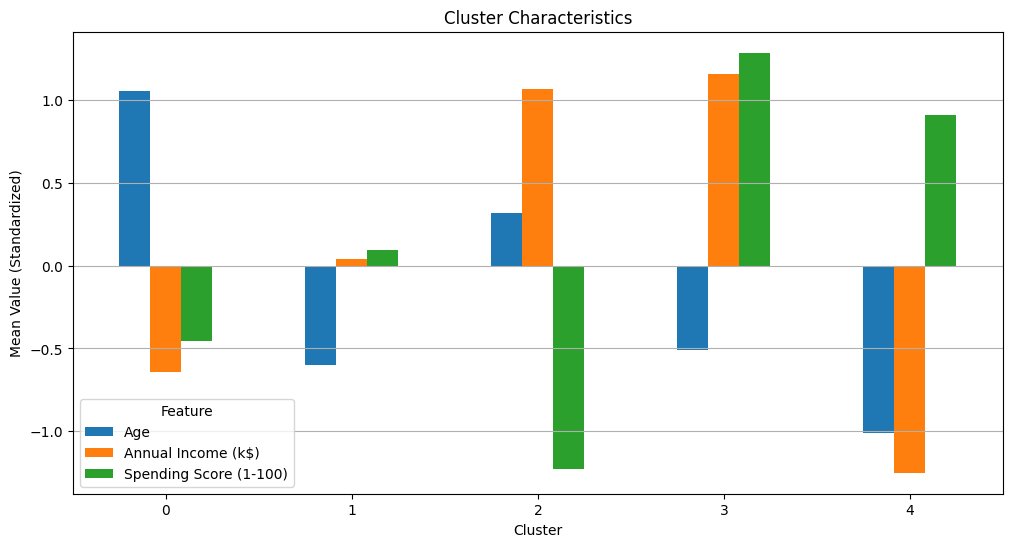

In [46]:
# Visualize cluster characteristics
cluster_characteristics.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value (Standardized)')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.grid(axis='y')
plt.show()

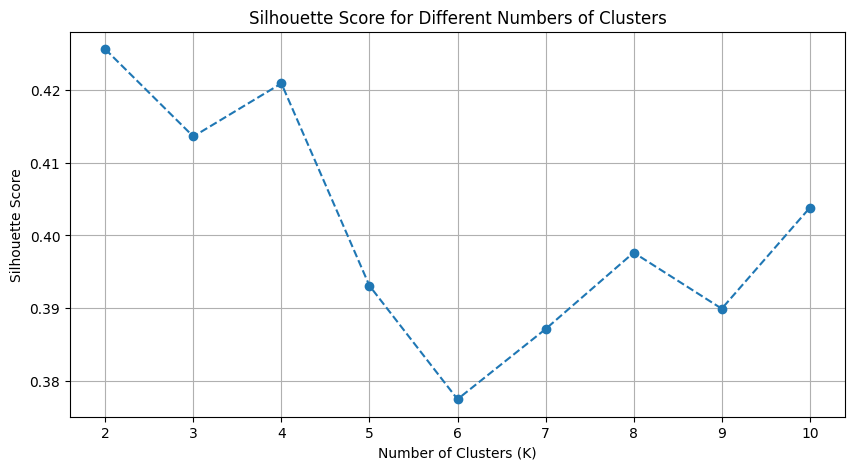

In [47]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

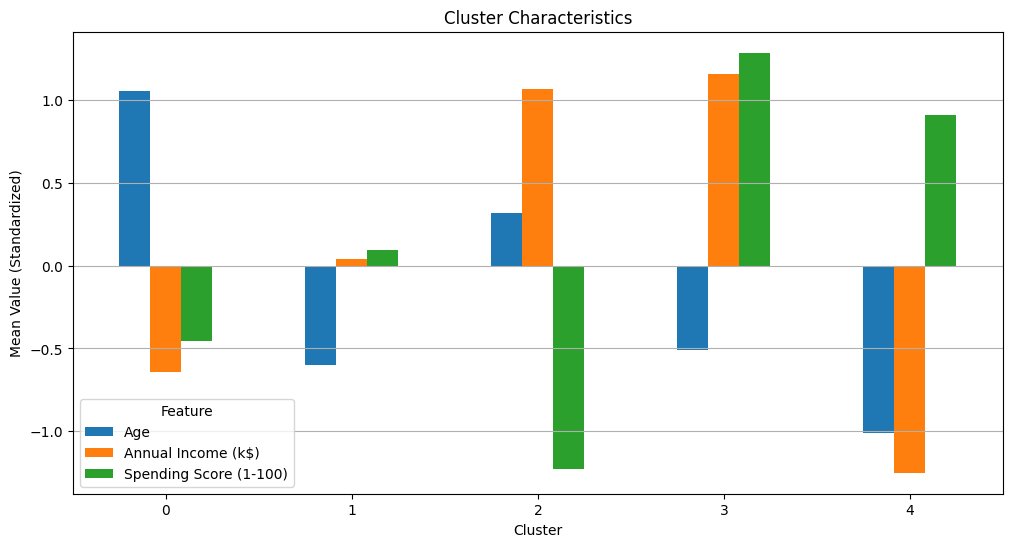

In [48]:
# Visualize cluster characteristics
cluster_characteristics.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value (Standardized)')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.grid(axis='y')
plt.show()

 **1.How does K-Means clustering work?**
 K-Means clustering is an iterative algorithm that aims to partition a dataset into K distinct, non-overlapping subgroups (clusters). It works by:
Initialization: Randomly selecting K data points as initial cluster centroids.
Assignment: Assigning each data point to the nearest centroid based on a distance metric (usually Euclidean distance).
Update: Recalculating the centroids as the mean of all data points assigned to that cluster.
Iteration: Repeating the assignment and update steps until the centroids no longer move significantly or a maximum number of iterations is reached.

 **2.What is the Elbow method?**
  The Elbow method is a heuristic used to determine the optimal number of clusters (K) for K-Means. It involves calculating the Within-Cluster Sum of Squares (WCSS) for a range of K values. WCSS is the sum of the squared distances between each data point and its assigned cluster centroid. When plotting WCSS against the number of clusters (K), the plot typically shows a rapid decrease in WCSS as K increases, followed by a point where the rate of decrease slows down, forming an "elbow" shape. This elbow point is often considered the optimal K, as adding more clusters beyond this point provides diminishing returns in reducing WCSS.

 **3.What are the limitations of K-Means?**
 Some limitations of K-Means include:
Sensitive to Initialization: The final clustering results can depend on the initial placement of centroids.
Assumes Spherical Clusters: K-Means works best with clusters that are roughly spherical and of similar size. It may struggle with clusters of irregular shapes or varying densities.
Requires Predefined K: You need to specify the number of clusters (K) beforehand, which can be challenging if you don't have prior knowledge of the data.
Sensitive to Outliers: Outliers can significantly affect the position of the centroids and thus the clustering results.
Not Suitable for Non-linear Data: K-Means uses linear decision boundaries between clusters.

 **4.How does initialization affect results?**
 Since K-Means starts with randomly chosen centroids, different initializations can lead to different final cluster assignments and centroids. This is because the algorithm can get stuck in local optima of the WCSS minimization. To mitigate this, it's common practice to run K-Means multiple times with different random initializations and choose the best result (e.g., the one with the lowest WCSS). The n_init parameter in scikit-learn's KMeans controls the number of different initializations.

 **5.What is inertia in K-Means?**
 Inertia, also known as the Within-Cluster Sum of Squares (WCSS), is a measure of how well the data points are grouped around their respective cluster centroids. It is calculated as the sum of the squared distances between each data point and the centroid of the cluster it belongs to. A lower inertia generally indicates better clustering, meaning the data points are closer to their centroids.

 **6.What is Silhouette Score?**
 The Silhouette Score is a metric used to evaluate the quality of clustering. It measures how similar a data point is to its own cluster compared to other clusters. The Silhouette Score for a single data point ranges from -1 to +1:
A score close to +1 indicates that the data point is well-clustered and is far from neighboring clusters.
A score near 0 suggests that the data point is close to the decision boundary between two neighboring clusters.
A score close to -1 means that the data point may have been assigned to the wrong cluster. The overall Silhouette Score for a clustering is the average Silhouette Score of all data points. A higher average Silhouette Score generally indicates better clustering.

 **7.How do you choose the right number of clusters?**
 Choosing the right number of clusters (K) is a crucial step. Common methods include:
Elbow Method: Plotting WCSS against K and looking for the "elbow" point where the rate of decrease slows down.
Silhouette Analysis: Calculating the average Silhouette Score for different K values and choosing the K that yields the highest score.
Domain Knowledge: If you have prior knowledge about the data or the problem, you might have an idea of how many clusters to expect.
Visual Inspection: For 2D or 3D data, you can visualize the clusters for different K values and see which one appears to make the most sense visually.

 **8.What’s the difference between clustering and classification?**
 What’s the difference between clustering and classification?
Clustering is an unsupervised learning technique. Its goal is to group data points into clusters based on their inherent similarities without any predefined labels. You're trying to discover hidden patterns or structures in the data.
Classification is a supervised learning technique. Its goal is to assign data points to predefined categories or classes based on labeled training data. You have a set of input features and corresponding output labels, and you train a model to predict the label for new, unseen data points.